In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
app_info = pd.read_csv('AppleStore.csv')

In [287]:
app_info.head()

,track_name,size_bytes,currency,price,rating_count_tot,rating_count_cur,user_rating,user_rating_cur,version,cont_rating,prime_genre,sup_devices_num,screenshot_num,lang_num,vpp_lic
0,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [4]:
app_info.columns

Index(['Unnamed: 0', 'id', 'track_name', 'size_bytes', 'currency', 'price',
       'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'],
      dtype='object')

In [4]:
# remove and rename columns 
app_info = app_info.drop(columns = ['Unnamed: 0', 'id'], axis = 1)
app_info.rename(columns = {'rating_count_ver':'rating_count_cur','user_rating_ver':'user_rating_cur','ver':'version' , 'sup_devices.num':'sup_devices_num','ipadSc_urls.num':'screenshot_num', 'lang.num':'lang_num'}, inplace = True)
app_info.head()

,track_name,size_bytes,currency,price,rating_count_tot,rating_count_cur,user_rating,user_rating_cur,version,cont_rating,prime_genre,sup_devices_num,screenshot_num,lang_num,vpp_lic
0,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [6]:
# check null value
print('App_info null value:')
print(app_info.isnull().sum())

App_info null value:
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_cur    0
user_rating         0
user_rating_cur     0
version             0
cont_rating         0
prime_genre         0
sup_devices_num     0
screenshot_num      0
lang_num            0
vpp_lic             0
dtype: int64


In [7]:
# check duplicated data

print('Duplicate data in app info:')
print(app_info.duplicated().sum())

Duplicate data in app info:
0


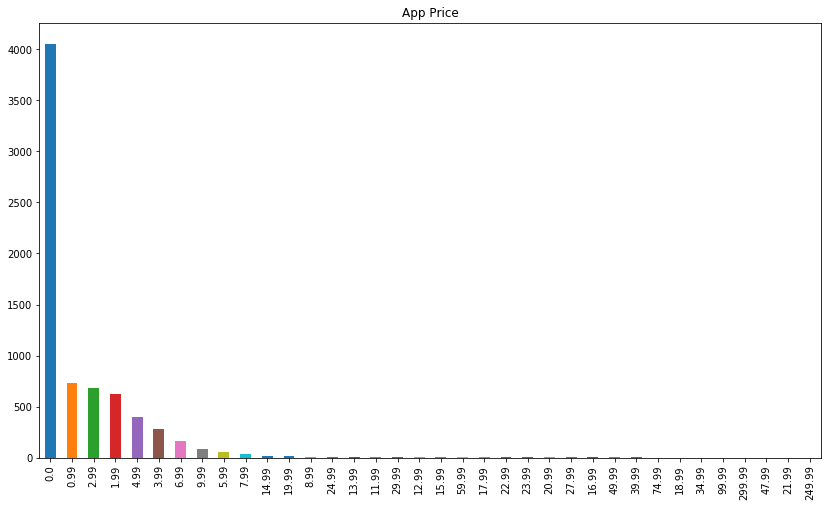

In [8]:
plt.figure(figsize=(14,8))
app_info.price.value_counts().plot(kind = 'bar')
plt.title('App Price')
plt.show()

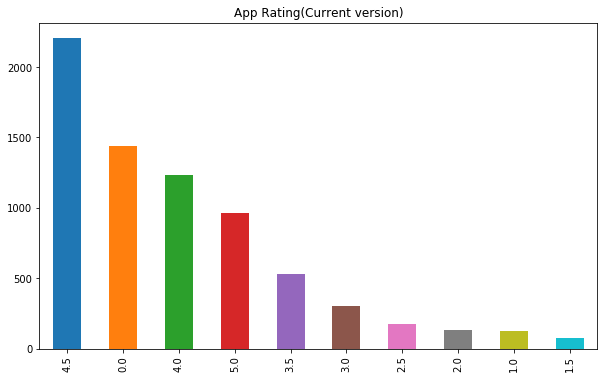

In [9]:
plt.figure(figsize=(10,6))
app_info.user_rating_cur.value_counts().plot(kind = 'bar')
plt.title('App Rating(Current version)')
plt.show()

In [5]:
# drop rating = 0.0
app_info = app_info[app_info.user_rating != 0.0]

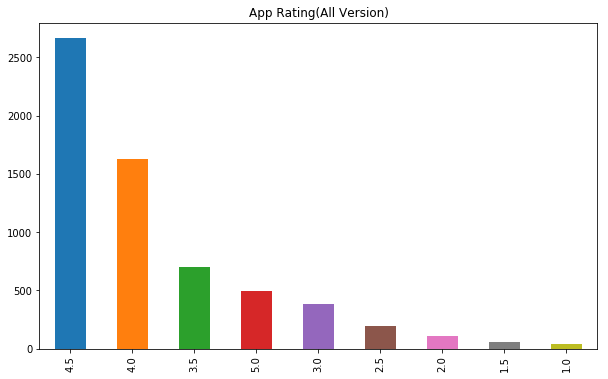

In [17]:
plt.figure(figsize=(10,6))
app_info.user_rating.value_counts().plot(kind = 'bar')
plt.title('App Rating(All Version)')
plt.show()

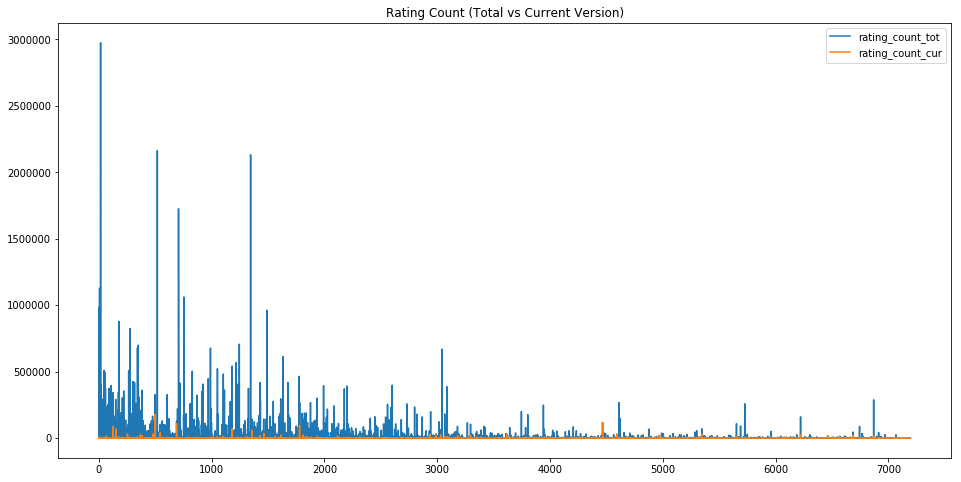

In [39]:
plt.figure(figsize=(16,8))
plt.plot(app_info.rating_count_tot)
plt.plot(app_info.rating_count_cur)
plt.title('Rating Count (Total vs Current Version)')
plt.legend()
plt.show()

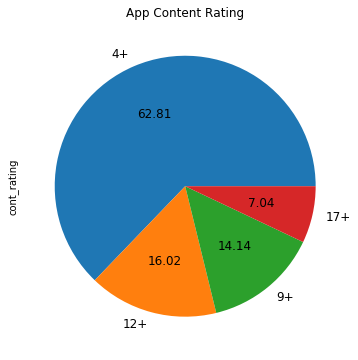

In [40]:
plt.figure(figsize=(6,6))
app_info.cont_rating.value_counts().plot(kind = 'pie', autopct='%.2f', fontsize=12)
plt.title('App Content Rating')
plt.show()

In [6]:
# replace string (1: all age, 2: age over9, 3: age over 12, 4: age over 17)
app_info_re = app_info
app_info_re = app_info_re.replace('4+',1)
app_info_re = app_info_re.replace('9+',2)
app_info_re = app_info_re.replace('12+',3)
app_info_re = app_info_re.replace('17+',4)

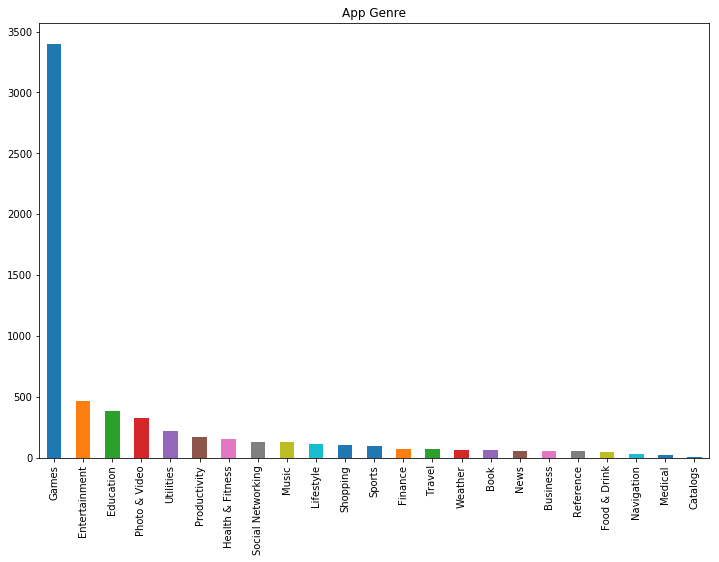

In [136]:
plt.figure(figsize=(12,8))
app_info.prime_genre.value_counts().plot(kind = 'bar')
plt.title('App Genre')
plt.show()

In [7]:
# replace string
app_info_re = app_info_re.replace('Games',1)
app_info_re = app_info_re.replace('Entertainment',2)
app_info_re = app_info_re.replace('Education',3)
app_info_re = app_info_re.replace('Photo & Video',4)
app_info_re = app_info_re.replace('Utilities',5)
app_info_re = app_info_re.replace('Health & Fitness',6)
app_info_re = app_info_re.replace('Productivity',7)
app_info_re = app_info_re.replace('Social Networking',8)
app_info_re = app_info_re.replace('Lifestyle',9)
app_info_re = app_info_re.replace('Music',10)
app_info_re = app_info_re.replace('Shopping',11)
app_info_re = app_info_re.replace('Sports',12)
app_info_re = app_info_re.replace('Book',13)
app_info_re = app_info_re.replace('Finance',14)
app_info_re = app_info_re.replace('Travel',15)
app_info_re = app_info_re.replace('News',16)
app_info_re = app_info_re.replace('Weather',17)
app_info_re = app_info_re.replace('Reference',18)
app_info_re = app_info_re.replace('Food & Drink',19)
app_info_re = app_info_re.replace('Business',20)
app_info_re = app_info_re.replace('Navigation',21)
app_info_re = app_info_re.replace('Medical',22)
app_info_re = app_info_re.replace('Catalogs',23)

In [16]:
app_info.head()

,track_name,size_bytes,currency,price,rating_count_tot,rating_count_cur,user_rating,user_rating_cur,version,cont_rating,prime_genre,sup_devices_num,screenshot_num,lang_num,vpp_lic
0,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [8]:
app_info_re = app_info_re.drop(columns = ['currency', 'version', 'vpp_lic'], axis = 1)

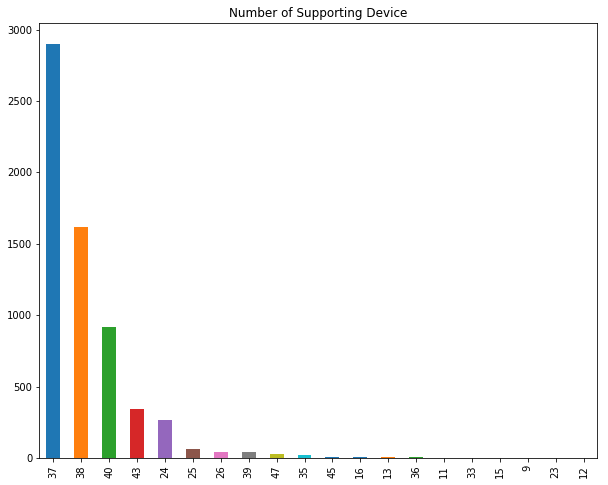

In [18]:
plt.figure(figsize=(10,8))
app_info.sup_devices_num.value_counts().plot(kind = 'bar')
plt.title('Number of Supporting Device')
plt.show()

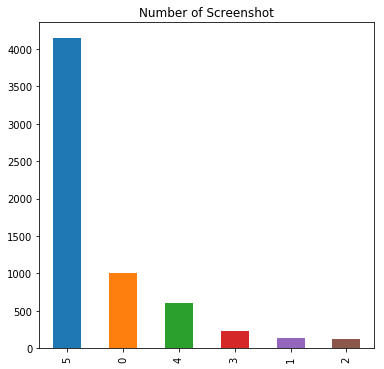

In [19]:
plt.figure(figsize=(6,6))
app_info.screenshot_num.value_counts().plot(kind = 'bar')
plt.title('Number of Screenshot')
plt.show()

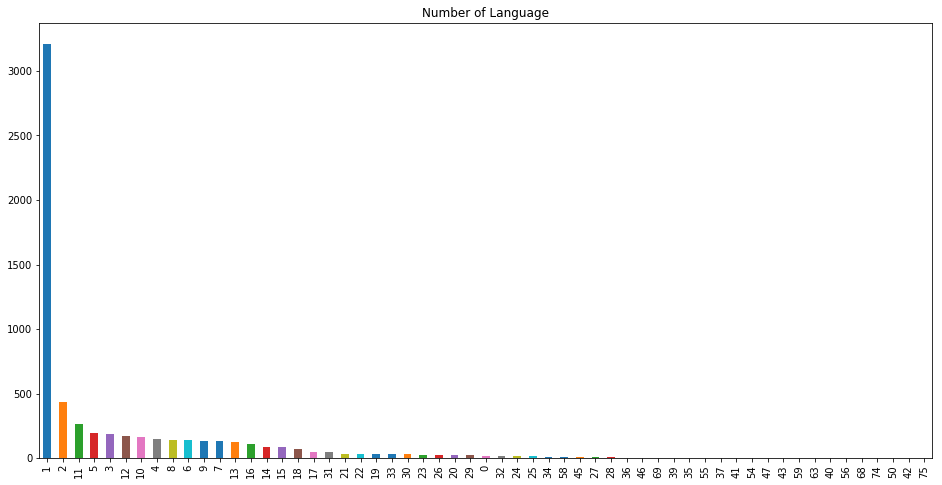

In [20]:
plt.figure(figsize=(16,8))
app_info.lang_num.value_counts().plot(kind = 'bar')
plt.title('Number of Language')
plt.show()

In [9]:
app_info_re['size_bytes'] = app_info_re['size_bytes'].apply(float)
app_info_re['price'] = app_info_re['price'].apply(float)
app_info_re['rating_count_tot'] = app_info_re['rating_count_tot'].apply(int)
app_info_re['rating_count_cur'] = app_info_re['rating_count_cur'].apply(int)
app_info_re['user_rating'] = app_info_re['user_rating'].apply(float)
app_info_re['user_rating_cur'] = app_info_re['user_rating_cur'].apply(float)
app_info_re['prime_genre'] = app_info_re['prime_genre'].apply(int)
app_info_re['sup_devices_num'] = app_info_re['sup_devices_num'].apply(int)
app_info_re['screenshot_num'] = app_info_re['screenshot_num'].apply(int)
app_info_re['lang_num'] = app_info_re['lang_num'].apply(int)
app_info_re['cont_rating'] = app_info_re['cont_rating'].apply(int)

In [10]:
app_info_free = app_info_re[app_info_re.price == 0.0]
app_info_free.head()

,track_name,size_bytes,price,rating_count_tot,rating_count_cur,user_rating,user_rating_cur,cont_rating,prime_genre,sup_devices_num,screenshot_num,lang_num
1,Evernote - stay organized,158578688.0,0.0,161065,26,4.0,3.5,1,7,37,5,23
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032.0,0.0,188583,2822,3.5,4.5,1,17,37,5,3
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000.0,0.0,262241,649,4.0,4.5,3,11,37,5,9
4,Bible,92774400.0,0.0,985920,5320,4.5,5.0,1,18,37,5,45
6,PayPal - Send and request money safely,227795968.0,0.0,119487,879,4.0,4.5,1,14,37,0,19


In [289]:
price_type = []
for i in app_info_re.price:
    if i == 0.00:
        price_type.append(0)
    else:
        price_type.append(1)

In [288]:
Price_type = pd.DataFrame(price_type, columns = ['price_type'], index = app_info_re.index)
Price_type.head()

,price_type
0,1
1,0
2,0
3,0
4,0


In [13]:
app_info_re['price_type'] = Price_type

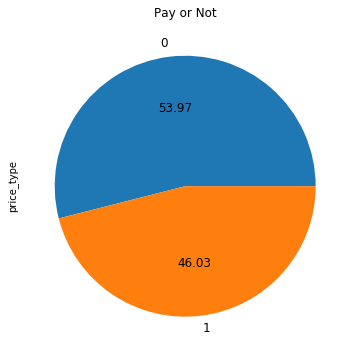

In [27]:
plt.figure(figsize=(6,6))
app_info_re.price_type.value_counts().plot(kind = 'pie', autopct='%.2f', fontsize=12)
plt.title('Pay or Not')
plt.show()

### Add A Column for rating type useing current rating

In [14]:
rating = []
for i in app_info_re.user_rating_cur:
    if i < 4.0:
        rating.append(0)
    else:
        rating.append(1)
        
app_info_re['rating_type'] = rating


,track_name,size_bytes,price,rating_count_tot,rating_count_cur,user_rating,user_rating_cur,cont_rating,prime_genre,sup_devices_num,screenshot_num,lang_num,price_type,rating_type
0,PAC-MAN Premium,100788224.0,3.99,21292,26,4.0,4.5,1,1,38,5,10,1,1
1,Evernote - stay organized,158578688.0,0.00,161065,26,4.0,3.5,1,7,37,5,23,0,0
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032.0,0.00,188583,2822,3.5,4.5,1,17,37,5,3,0,1
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000.0,0.00,262241,649,4.0,4.5,3,11,37,5,9,0,1
4,Bible,92774400.0,0.00,985920,5320,4.5,5.0,1,18,37,5,45,0,1


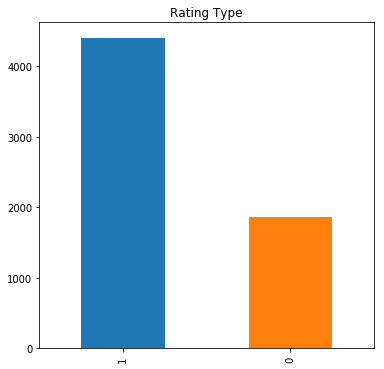

In [29]:
plt.figure(figsize=(6,6))
app_info_re.rating_type.value_counts().plot(kind = 'bar')
plt.title('Rating Type')
plt.show()

In [15]:
app_info_re['rating_count_be'] = app_info_re['rating_count_tot'] - app_info_re['rating_count_cur']

In [17]:
app_info_re.head()

,track_name,size_bytes,price,rating_count_tot,rating_count_cur,user_rating,user_rating_cur,cont_rating,prime_genre,sup_devices_num,screenshot_num,lang_num,price_type,rating_type,rating_count_be
0,PAC-MAN Premium,100788224.0,3.99,21292,26,4.0,4.5,1,1,38,5,10,1,1,21266
1,Evernote - stay organized,158578688.0,0.00,161065,26,4.0,3.5,1,7,37,5,23,0,0,161039
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032.0,0.00,188583,2822,3.5,4.5,1,17,37,5,3,0,1,185761
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000.0,0.00,262241,649,4.0,4.5,3,11,37,5,9,0,1,261592
4,Bible,92774400.0,0.00,985920,5320,4.5,5.0,1,18,37,5,45,0,1,980600


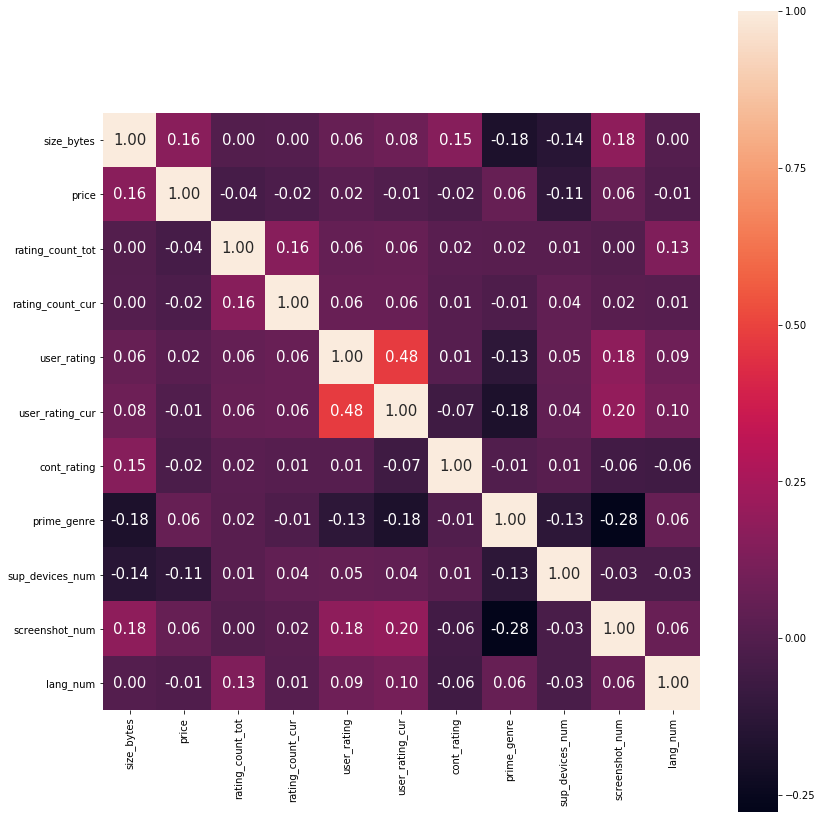

In [19]:
#correlation map
cols = ['size_bytes', 'price', 'rating_count_tot', 'rating_count_cur', 'user_rating','user_rating_cur','cont_rating', 'prime_genre','sup_devices_num', 'screenshot_num', 'lang_num']

cm = np.corrcoef(app_info_re[cols].values.T)

# Get heat map
plt.figure(figsize=(12,12))
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

# Show heat map
plt.tight_layout()
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


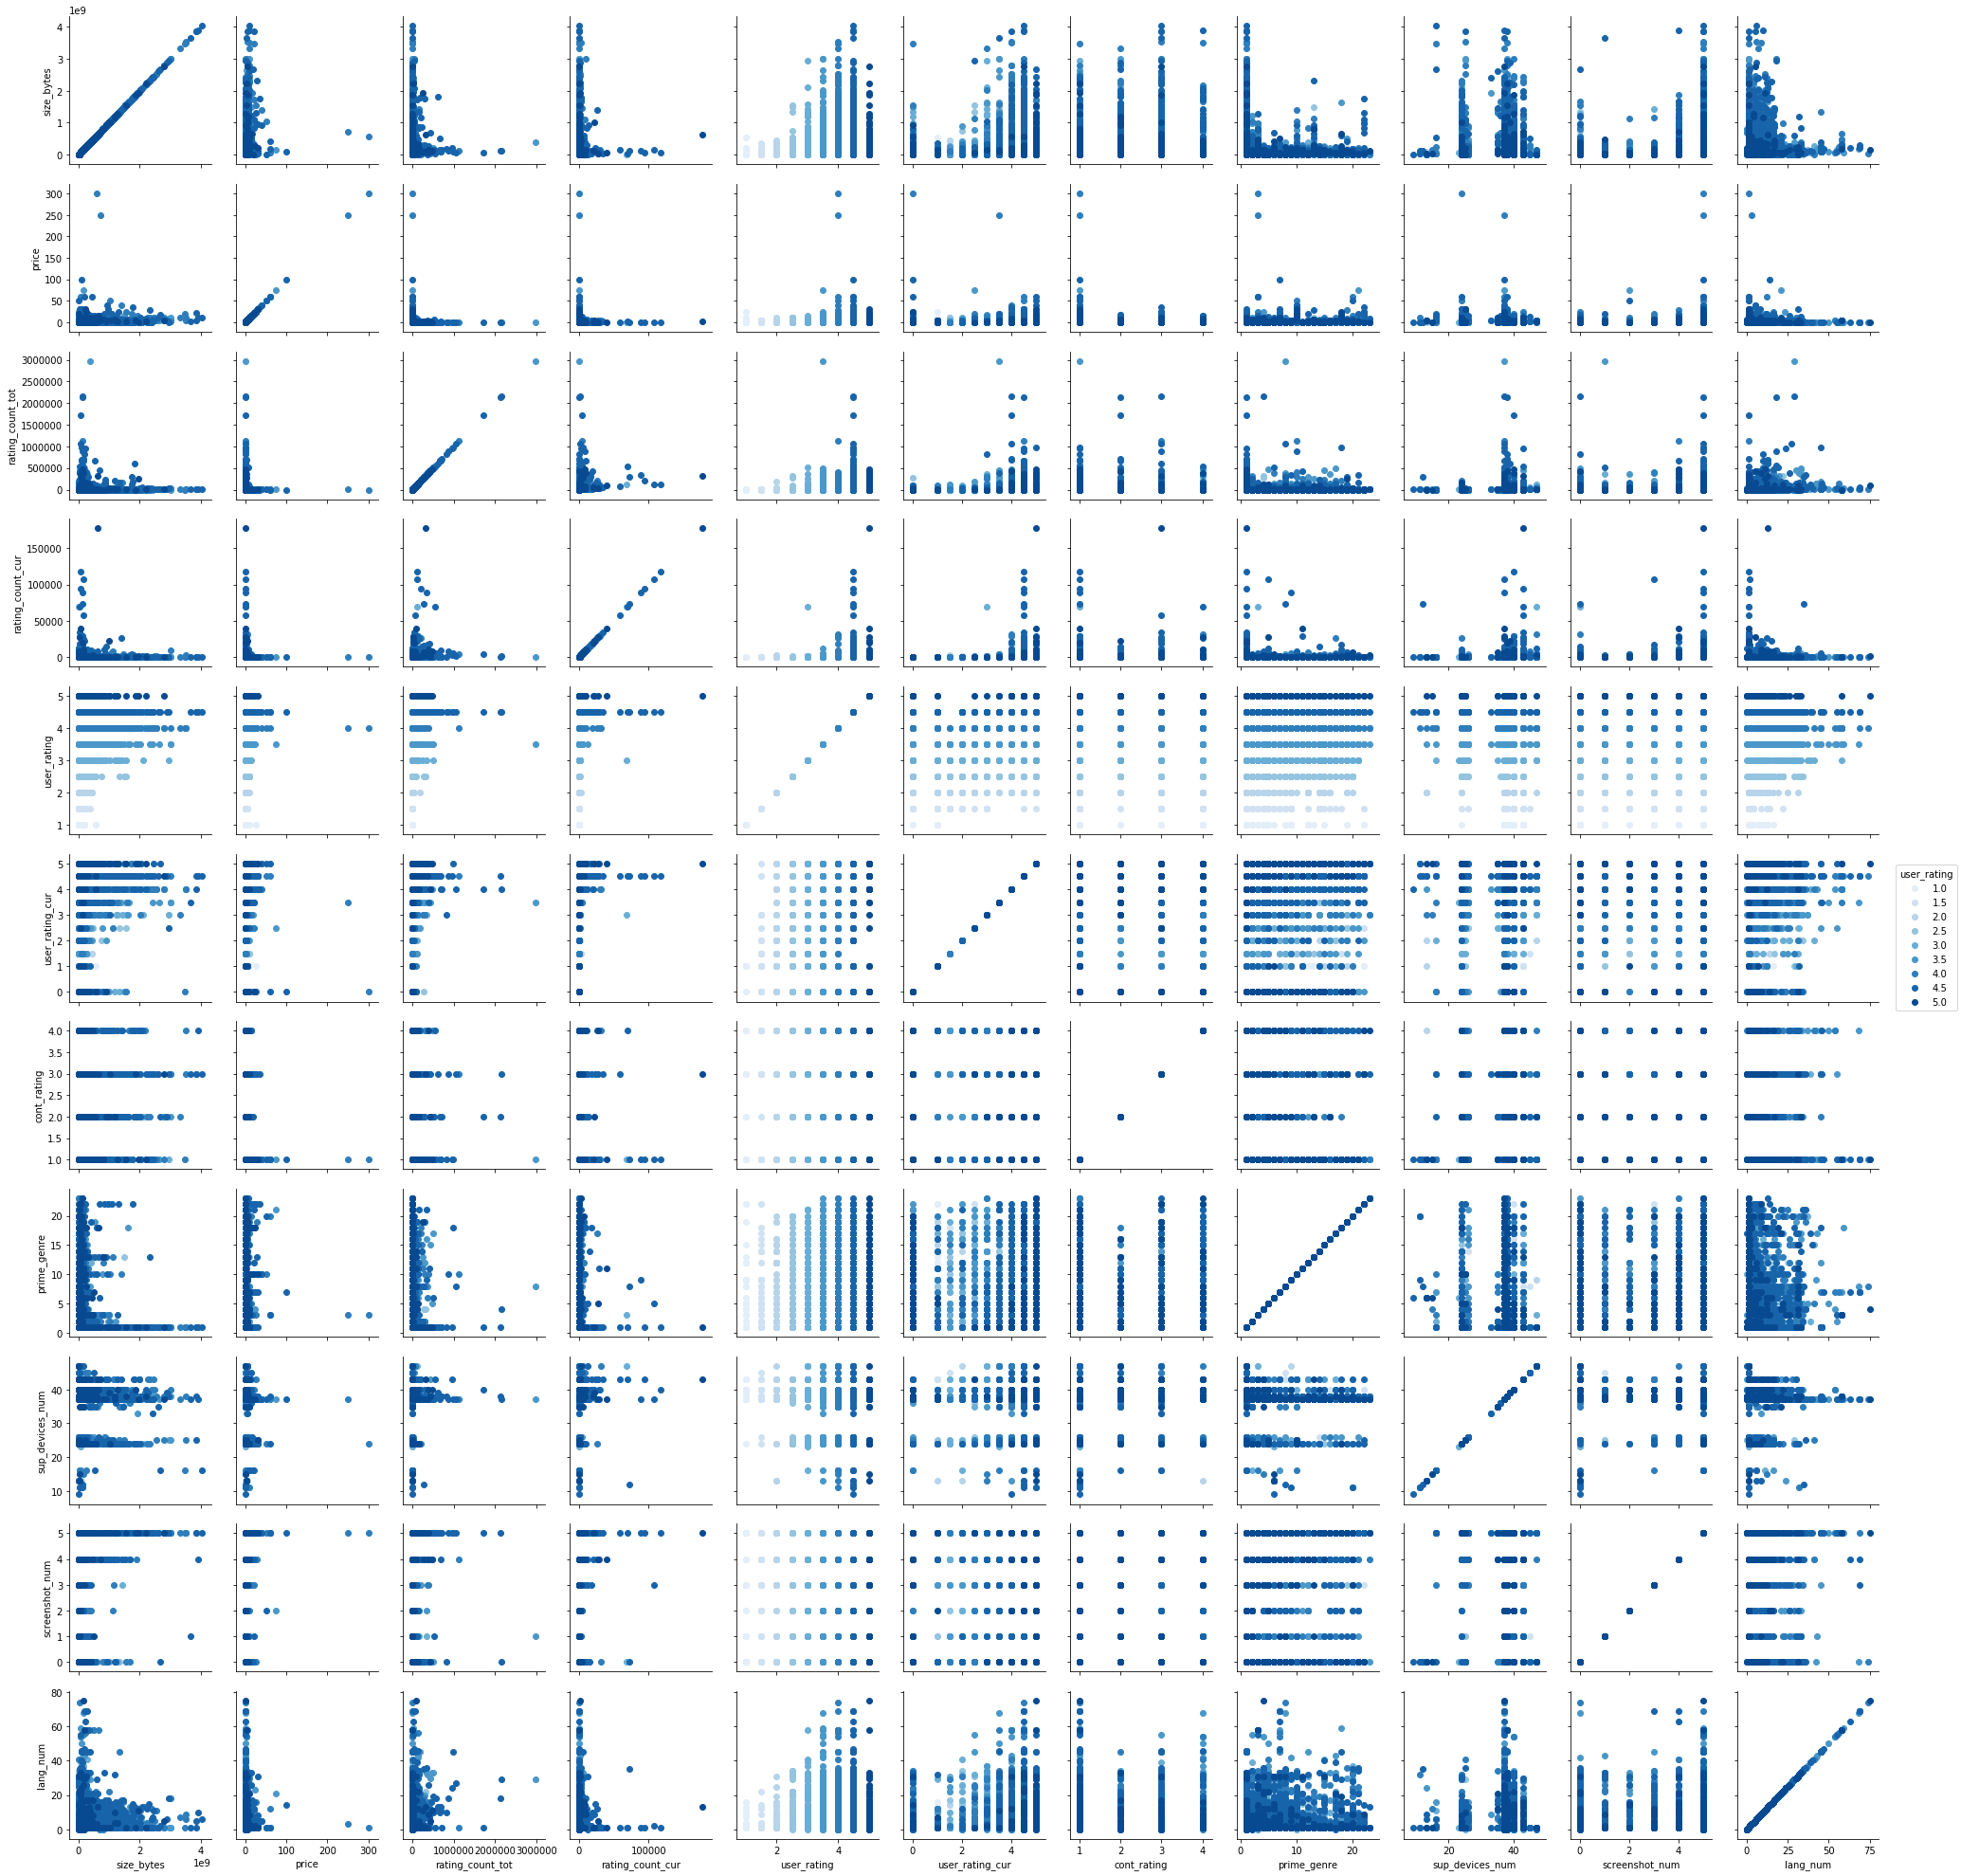

In [122]:
# Pair Grid - showing the relationships in the dataset
df_plot = app_info_re.ix[:, cols]

pairplot = sns.PairGrid(df_plot, hue = 'user_rating', palette = "Blues")
pairplot = pairplot.map(plt.scatter)
pairplot = pairplot.add_legend()

/Users/phoebewu/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


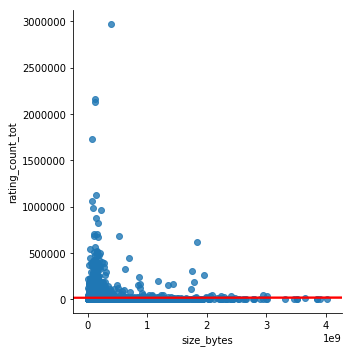

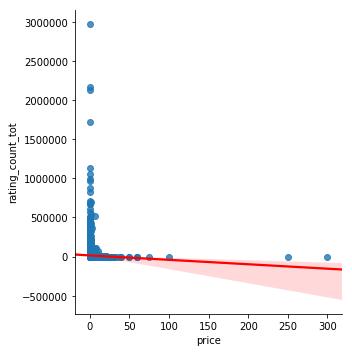

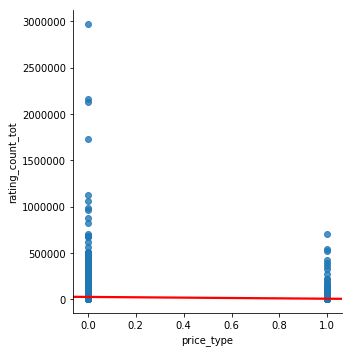

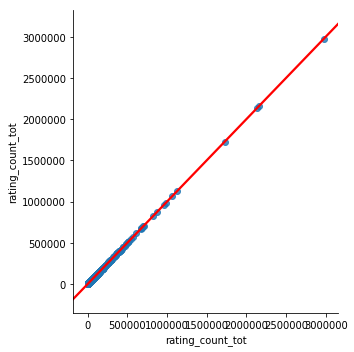

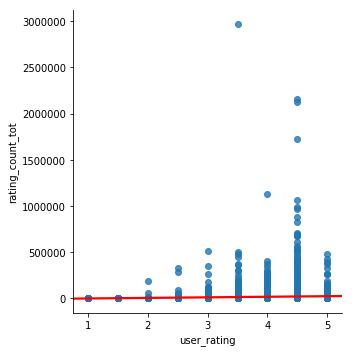

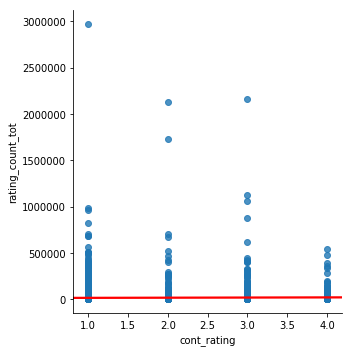

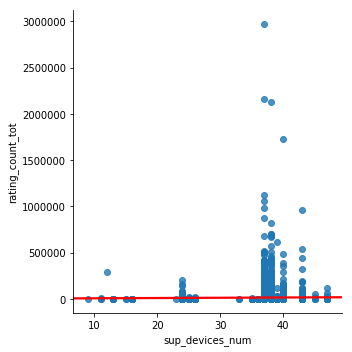

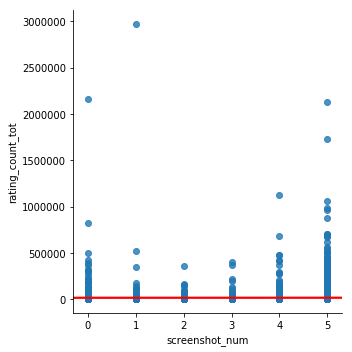

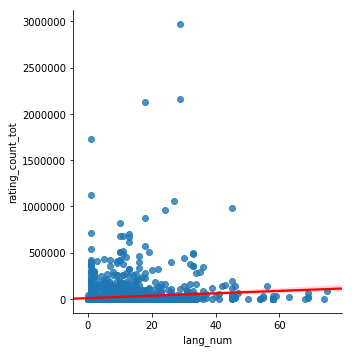

In [34]:
# Rating Count for Total
col_cur = ['size_bytes', 'price', 'price_type','rating_count_tot', 'user_rating','cont_rating','sup_devices_num', 'screenshot_num', 'lang_num']
target_idx = len(col_cur) - 6
for exp_var_idx in range(len(col_cur)):
    
    sns.lmplot(x = app_info_re[col_cur].columns[exp_var_idx], y = app_info_re[col_cur].columns[target_idx], data = app_info_re[col_cur], line_kws={"color":"red"})  
    
plt.tight_layout()
plt.show()

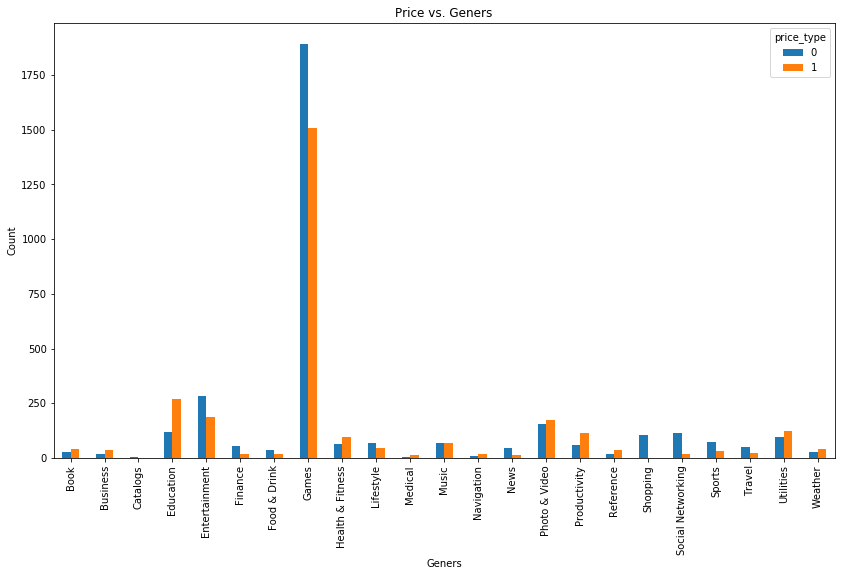

In [35]:
# Price vs. Geners
pd.crosstab(app_info.prime_genre,app_info_re.price_type).plot(kind='bar', figsize = (14,8))
plt.title('Price vs. Geners')
plt.xlabel('Geners')
plt.ylabel('Count')
plt.show()

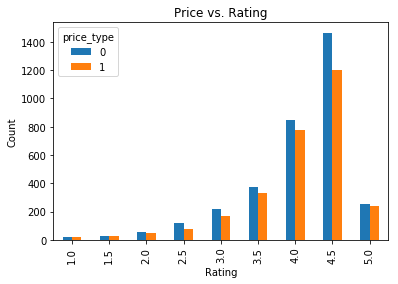

In [36]:
# Price vs. Rating
pd.crosstab(app_info.user_rating,app_info_re.price_type).plot(kind='bar')
plt.title('Price vs. Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

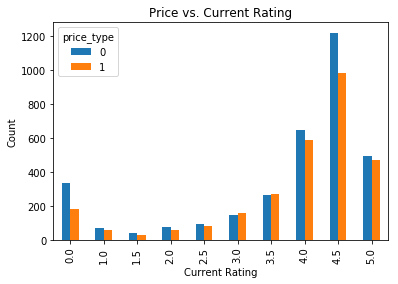

In [37]:
# Price vs. Current Rating
pd.crosstab(app_info.user_rating_cur,app_info_re.price_type).plot(kind='bar')
plt.title('Price vs. Current Rating')
plt.xlabel('Current Rating')
plt.ylabel('Count')
plt.show()

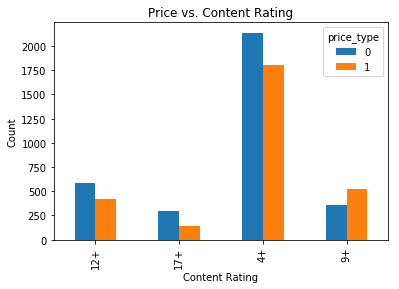

In [38]:
# Price vs. Content Rating
pd.crosstab(app_info.cont_rating,app_info_re.price_type).plot(kind='bar')
plt.title('Price vs. Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.show()

In [39]:
app_info_re.head()

,track_name,size_bytes,price,rating_count_tot,rating_count_cur,user_rating,user_rating_cur,cont_rating,prime_genre,sup_devices_num,screenshot_num,lang_num,price_type,rating_type,rating_count_be
0,PAC-MAN Premium,100788224.0,3.99,21292,26,4.0,4.5,1,1,38,5,10,1,1,21266
1,Evernote - stay organized,158578688.0,0.00,161065,26,4.0,3.5,1,7,37,5,23,0,0,161039
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032.0,0.00,188583,2822,3.5,4.5,1,17,37,5,3,0,1,185761
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000.0,0.00,262241,649,4.0,4.5,3,11,37,5,9,0,1,261592
4,Bible,92774400.0,0.00,985920,5320,4.5,5.0,1,18,37,5,45,0,1,980600


## Feature Importance

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
import matplotlib
from matplotlib.colors import ListedColormap
from sklearn import neighbors
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score, roc_curve

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


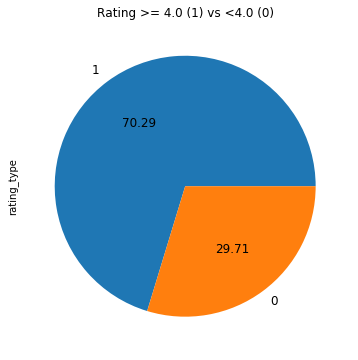

In [82]:
plt.figure(figsize=(6,6))
app_info_re.rating_type.value_counts().plot(kind = 'pie', autopct='%.2f', fontsize=12)
plt.title('Rating >= 4.0 (1) vs <4.0 (0)')
plt.show()

### Current Rating's feature importance

In [204]:
fm_rating = ['size_bytes', 'price', 'price_type','rating_count_be','cont_rating','sup_devices_num', 'screenshot_num', 'lang_num', 'prime_genre']

y = app_info_re.iloc[:, 13:14].values.reshape(-1, 1)
X_df = app_info_re.ix[:, fm_rating]
X = app_info_re.ix[:, fm_rating].values

class_le = LabelEncoder()
y = class_le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [205]:
# Random forest classifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train) 

importances = rfc.feature_importances_
# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, X_df.columns[:])

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

f_importances

rating_count_be    0.271586
size_bytes         0.253062
prime_genre        0.116598
lang_num           0.108699
sup_devices_num    0.063849
price              0.062622
screenshot_num     0.059402
cont_rating        0.047161
price_type         0.017021
dtype: float64

In [206]:
fscores = []
for k in range(1, 10):
    X = X_df[f_importances.index[:k]].values
    y = app_info_re.iloc[:, 13:14].values.ravel()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50, stratify=y)
    
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    y_train = class_le.fit_transform(y_train)
    y_test = class_le.fit_transform(y_test)
    
    rfc_k = RandomForestClassifier(random_state=0)
    rfc_k.fit(X_train, y_train)
    
    y_pred_k = rfc_k.predict(X_test)
    
    precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_k, average='micro') 
    
    fscores.append(fscore)
    print("Top", k)
    print(f_importances.index[:k])
    print(precision, recall, fscore, support)


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Top 1
Index(['rating_count_be'], dtype='object')
0.6549707602339181 0.6549707602339181 0.6549707602339181 None
Top 2
Index(['rating_count_be', 'size_bytes'], dtype='object')
0.6581605528973951 0.6581605528973951 0.6581605528973951 None
Top 3
Index(['rating_count_be', 'size_bytes', 'prime_genre'], dtype='object')
0.6863370547581074 0.6863370547581074 0.6863370547581074 None
Top 4
Index(['rating_count_be', 'size_bytes', 'prime_genre', 'lang_num'], dtype='object')
0.6730462519936204 0.6730462519936204 0.6730462519936204 None
Top 5
Index(['rating_count_be', 'size_bytes', 'prime_genre', 'lang_num',
       'sup_devices_num'],
      dtype='object')
0.695906432748538 0.695906432748538 0.695906432748538 None
Top 6
Index(['rating_count_be', 'size_bytes', 'prime_genre', 'lang_num',
       'sup_devices_num', 'price'],
      dtype='object')
0.6735778841041999 0.6735778841041999 0.6735778841041999 None
Top 7
Index(['rating_count_be', 'size_bytes', 'prime_genre', 'lang_num',
       'sup_devices_num',

## Random Forest for Current Rating

In [248]:
train_score = []
test_score = []
F_score = []

rf_rating = ['rating_count_be', 'size_bytes', 'prime_genre', 'lang_num', 'sup_devices_num']

y = app_info_re.rating_type.values
X = app_info_re.ix[:, rf_rating].values

class_le = LabelEncoder()
y = class_le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

rfc = RandomForestClassifier()
rfc.fit(X_train_std, y_train)
y_pred = rfc.predict(X_test_std)

train_score.append(rfc.score(X_train_std, y_train))
test_score.append(rfc.score(X_test_std, y_test))
F_score.append(f1_score(y_test, y_pred, average='weighted'))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [249]:
print('Random Forest Training accuracy', rfc.score(X_train_std, y_train))
print('Random Forest Tseting accuracy', rfc.score(X_test_std, y_test))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Random Forest Training accuracy 0.9810804650102576
Random Forest Tseting accuracy 0.696969696969697
Confusion Matrix:
[[ 269  290]
 [ 280 1042]]
             precision    recall  f1-score   support

          0       0.49      0.48      0.49       559
          1       0.78      0.79      0.79      1322

avg / total       0.70      0.70      0.70      1881



In [250]:
Model = []
Model.append('Random Forest Classification')
AUC_all = []
Fpr = []
Tpr = []

rf_roc_auc = roc_auc_score(y_test, y_pred)
AUC_all.append(rf_roc_auc)
fpr_f, tpr_f, thresholds_f = roc_curve(y_test, y_pred)
Fpr.append(fpr_f)
Tpr.append(tpr_f)

## KNN for User Current Rating

In [251]:
knn_rating = ['rating_count_be', 'lang_num', 'prime_genre','sup_devices_num', 'size_bytes']

y = app_info_re.rating_type.values
X = app_info_re.ix[:, knn_rating].values

class_le = LabelEncoder()
y = class_le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

n_neighbors = 10

knn = neighbors.KNeighborsClassifier(n_neighbors)
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)

train_score.append(knn.score(X_train_std, y_train))
test_score.append(knn.score(X_test_std, y_test))
F_score.append(f1_score(y_test, y_pred, average='weighted'))

print('KNN Training Accuracy',knn.score(X_train_std, y_train))
print('KNN Testing Accuracy',knn.score(X_test_std, y_test))
print('F1 score', f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


KNN Training Accuracy 0.7538180989286528
KNN Testing Accuracy 0.6953748006379585
F1 score 0.6830773071582533
             precision    recall  f1-score   support

          0       0.48      0.38      0.42       559
          1       0.76      0.83      0.79      1322

avg / total       0.68      0.70      0.68      1881



In [252]:
Model.append('KNN')
knn_roc_auc = roc_auc_score(y_test, y_pred)
AUC_all.append(knn_roc_auc)

fpr_f, tpr_f, thresholds_f = roc_curve(y_test, y_pred)
Fpr.append(fpr_f)
Tpr.append(tpr_f)

### Try PCA Feature Selection for Rating
#### To see if get the better accuracy

In [165]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


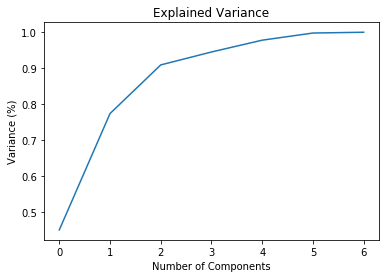

In [224]:
app_info_co = ['size_bytes', 'cont_rating', 'prime_genre', 'screenshot_num','lang_num', 'rating_count_be', 'sup_devices_num']

y = app_info_re.rating_type.values
X = app_info_re.ix[:, app_info_co].values

class_le = LabelEncoder()
y = class_le.fit_transform(y)

scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(X)

pca = PCA().fit(data_rescaled)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

In [225]:
pca = PCA(n_components=5)
X = pca.fit_transform(data_rescaled)

class_le = LabelEncoder()
y = class_le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

knn = neighbors.KNeighborsClassifier(n_neighbors)
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)

print('KNN Training Accuracy(after PCA)', knn.score(X_train_std, y_train))
print('KNN Testing Accuracy(after PCA)', knn.score(X_test_std, y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

KNN Training Accuracy(after PCA) 0.7490312286300433
KNN Testing Accuracy(after PCA) 0.7006911217437534
[[ 206  353]
 [ 210 1112]]
             precision    recall  f1-score   support

          0       0.50      0.37      0.42       559
          1       0.76      0.84      0.80      1322

avg / total       0.68      0.70      0.69      1881



#### Cross Validation 

In [168]:
from sklearn.model_selection import StratifiedKFold

In [169]:
#from sklearn.model_selection import cross_val_score
cv = StratifiedKFold(n_splits=10, random_state=2000)
n_neighbors = 10

y = app_info_re.rating_type.values
X = app_info_re.ix[:, knn_rating].values

class_le = LabelEncoder()
y = class_le.fit_transform(y)


sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

score = []
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
    clf.fit(X_train, y_train)
    score.append(clf.score(X_test, y_test))
    
score_m = sum(score)/ len(score)
print(score_m)    

0.690151342325912


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


## Logistic Regression for User Current Rating

In [253]:
lr_rating = ['rating_count_be', 'lang_num', 'prime_genre', 'size_bytes', 'sup_devices_num']

y = app_info_re.rating_type.values
X = app_info_re.ix[:, lr_rating].values

class_le = LabelEncoder()
y = class_le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train_std,y_train)
y_pred = lr.predict(X_test_std)

train_score.append(lr.score(X_train_std, y_train))
test_score.append(lr.score(X_test_std, y_test))
F_score.append(f1_score(y_test, y_pred, average='weighted'))

print("Logistic Regression Training accuracy: ",lr.score(X_train_std,y_train))
print("Logistic Regression Testing accuracy: ",lr.score(X_test_std,y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression Training accuracy:  0.7020743104627308
Logistic Regression Testing accuracy:  0.695906432748538
[[  45  514]
 [  58 1264]]
             precision    recall  f1-score   support

          0       0.44      0.08      0.14       559
          1       0.71      0.96      0.82      1322

avg / total       0.63      0.70      0.61      1881



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [254]:
Model.append('Logistic Regression')
lr_roc_auc = roc_auc_score(y_test, y_pred)
AUC_all.append(lr_roc_auc)

fpr_f, tpr_f, thresholds_f = roc_curve(y_test, y_pred)
Fpr.append(fpr_f)
Tpr.append(tpr_f)

## Decision Tree For User Current Rating

In [258]:
dt_rating = ['rating_count_be', 'lang_num', 'prime_genre', 'size_bytes', 'sup_devices_num']

y = app_info_re.rating_type.values
X = app_info_re.ix[:, dt_rating].values

class_le = LabelEncoder()
y = class_le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

dt = tree.DecisionTreeClassifier()
dt.fit(X_train_std,y_train)
y_pred = dt.predict(X_test_std)

train_score.append(dt.score(X_train_std, y_train))
test_score.append(dt.score(X_test_std, y_test))
F_score.append(f1_score(y_test, y_pred, average='weighted'))

print("Decision Tree Training accuracy: ",dt.score(X_train_std,y_train))
print("Decision Tree Testing accuracy: ",dt.score(X_test_std,y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Decision Tree Training accuracy:  1.0
Decision Tree Testing accuracy:  0.6432748538011696
[[237 322]
 [349 973]]
             precision    recall  f1-score   support

          0       0.40      0.42      0.41       559
          1       0.75      0.74      0.74      1322

avg / total       0.65      0.64      0.65      1881



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [256]:
Model.append('Decision Tree')
dt_roc_auc = roc_auc_score(y_test, y_pred)
AUC_all.append(dt_roc_auc)

fpr_f, tpr_f, thresholds_f = roc_curve(y_test, y_pred)
Fpr.append(fpr_f)
Tpr.append(tpr_f)

### Model Comparison

In [257]:
Model_comparison = pd.DataFrame(columns=['Classfier_name', 'train_score', 'test_score', 'F1_score'])

for i in range(4):
    Model_comparison.loc[i, 'Classfier_name'] = Model[i]
    Model_comparison.loc[i, 'train_score'] = train_score[i]
    Model_comparison.loc[i, 'test_score'] = test_score[i]
    Model_comparison.loc[i, 'F1_score'] = F_score[i]
    
Model_comparison

,Classfier_name,train_score,test_score,F1_score
0,Random Forest Classification,0.98108,0.69697,0.696173
1,KNN,0.753818,0.695375,0.683077
2,Logistic Regression,0.702074,0.695906,0.613539
3,Decision Tree,1,0.651249,0.653317


### Comparison of AUC & ROC Curve 

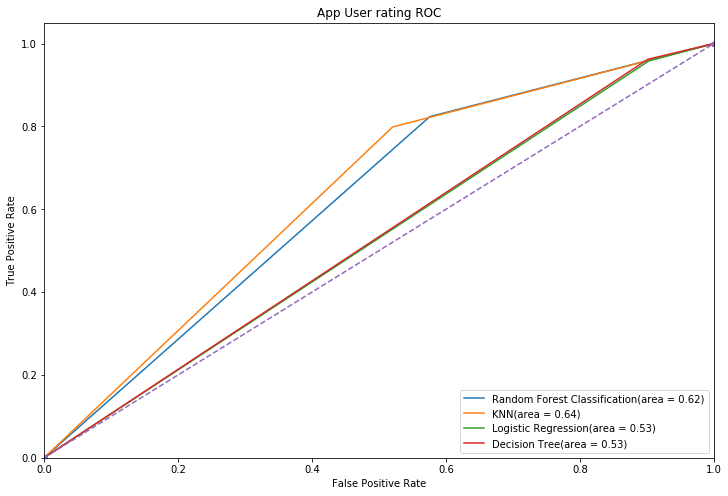

In [45]:
plt.figure(figsize=(12,8))
for i in range(4):
    
    plt.plot(Fpr[i], Tpr[i], label = Model[i] + '(area = %0.2f)' % AUC_all[i])
        
plt.plot([0, 1], [0, 1],'p--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('App User rating ROC')
plt.legend(loc="lower right")

plt.show() 

# Rating Count's Regression

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

## Linear Regression 

In [309]:
'''model_count = []
train_acc = []
test_acc = []'''

lr_ratingcount = ['size_bytes','rating_count_be','cont_rating','lang_num', 'sup_devices_num']

y = app_info_re.iloc[:, 3:4].values.reshape(-1, 1)
X = app_info_re.ix[:, lr_ratingcount].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

'''sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)'''

regression = LinearRegression()
regression.fit(X_train, y_train)

model_count.append('Linear Regression')
train_acc.append(regression.score(X_train, y_train))
test_acc.append(regression.score(X_test, y_test))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [310]:
y_pred = regression.predict(X_test)
print('Linear Regression R Square', regression.score(X_test, y_test))

mse = mean_squared_error(y_pred, y_test)
print('Linear Regression MSE', mse)

Linear Regression R Square 0.9980453438691635
Linear Regression MSE 8811711.018929781


## Random Forest Regression

In [285]:
rfr_ratingcount = ['size_bytes', 'price', 'price_type','rating_count_be','cont_rating','sup_devices_num', 'screenshot_num', 'lang_num', 'prime_genre']

y = app_info_re.rating_count_tot.values
X = app_info_re.ix[:, rfr_ratingcount].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

rf_reg = RandomForestRegressor(random_state = 0)
rf_reg.fit(X_train_std, y_train)
y_pred = rf_reg.predict(X_test_std)

X_df = app_info_re.ix[:, rfr_ratingcount]
importances = rf_reg.feature_importances_
# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, X_df.columns[:])

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

f_importances

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


rating_count_be    0.947414
lang_num           0.035115
cont_rating        0.007469
size_bytes         0.007383
sup_devices_num    0.001700
screenshot_num     0.000452
prime_genre        0.000422
price              0.000032
price_type         0.000012
dtype: float64

In [286]:
rfr_ratingcount = ['size_bytes','rating_count_be','cont_rating','lang_num', 'sup_devices_num']

y = app_info_re.rating_count_tot.values
X = app_info_re.ix[:, rfr_ratingcount].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 100)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_std, y_train)
y_pred = rf_reg.predict(X_test_std)

model_count.append('Random Forest Regressor')
train_acc.append(rf_reg.score(X_train_std, y_train))
test_acc.append(rf_reg.score(X_test_std, y_test))

print('Ramdon Forest R Square', rf_reg.score(X_test_std, y_test))

Ramdon Forest R Square 0.8709261402129879


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [273]:
Model_comparison_count = pd.DataFrame(columns=['Regression_name', 'train_score', 'R square'])

for i in range(2):
    Model_comparison_count.loc[i, 'Regression_name'] = model_count[i]
    Model_comparison_count.loc[i, 'train_score'] = train_acc[i]
    Model_comparison_count.loc[i, 'R square'] = test_acc[i]
    
Model_comparison_count

,Regression_name,train_score,R square
0,Linear Regression,0.998983,0.986962
1,Random Forest Regressor,0.993968,0.906868


### Rating more than 4.0

In [63]:
top_rating = app_info[app_info['user_rating'] >= 4.0]
top_rating['price_type'] = app_info_re['price_type']
top_rating

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,track_name,size_bytes,currency,price,rating_count_tot,rating_count_cur,user_rating,user_rating_cur,version,cont_rating,prime_genre,sup_devices_num,screenshot_num,lang_num,vpp_lic,price_type
0,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,1
1,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,0
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,0
4,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,0
5,Shanghai Mahjong,10485713,USD,0.99,8253,5516,4.0,4.0,1.8,4+,Games,47,5,1,1,1
6,PayPal - Send and request money safely,227795968,USD,0.00,119487,879,4.0,4.5,6.12.0,4+,Finance,37,0,19,1,0
7,Pandora - Music & Radio,130242560,USD,0.00,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1,0
8,PCalc - The Best Calculator,49250304,USD,9.99,1117,4,4.5,5.0,3.6.6,4+,Utilities,37,5,1,1,1
9,Ms. PAC-MAN,70023168,USD,3.99,7885,40,4.0,4.0,4.0.4,4+,Games,38,0,10,1,1
10,Solitaire by MobilityWare,49618944,USD,4.99,76720,4017,4.5,4.5,4.10.1,4+,Games,38,4,11,1,1


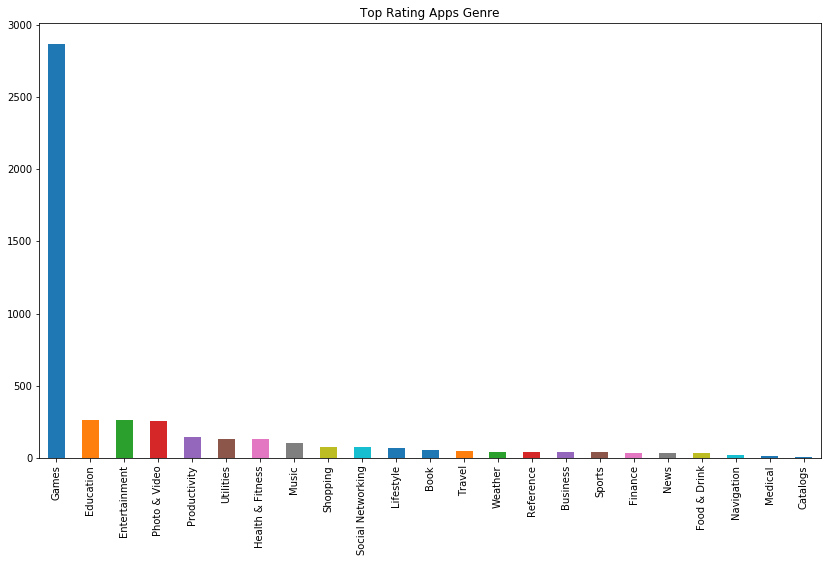

In [64]:
plt.figure(figsize=(14,8))
top_rating.prime_genre.value_counts().plot(kind = 'bar')
plt.title('Top Rating Apps Genre')
plt.show()

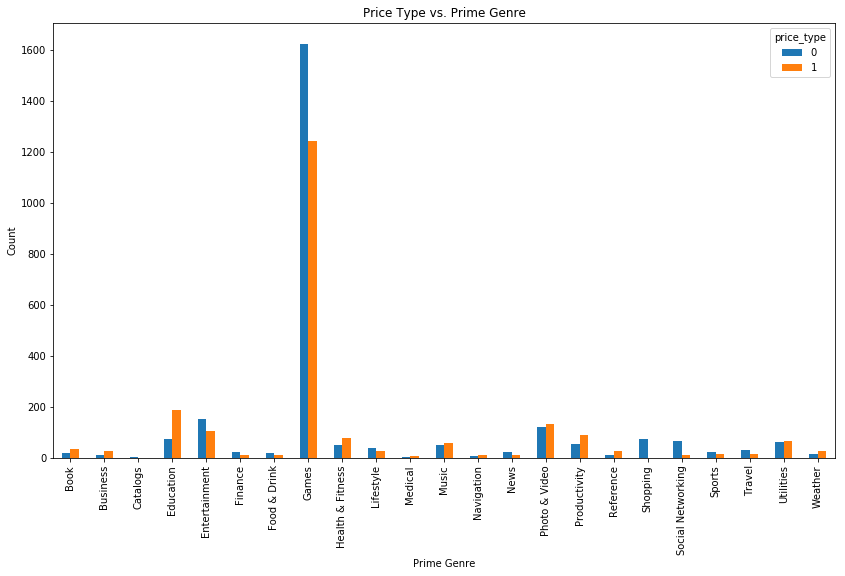

In [65]:
pd.crosstab(top_rating.prime_genre,top_rating.price_type).plot(kind='bar', figsize = (14,8))
plt.title('Price Type vs. Prime Genre')
plt.xlabel('Prime Genre')
plt.ylabel('Count')
plt.show()

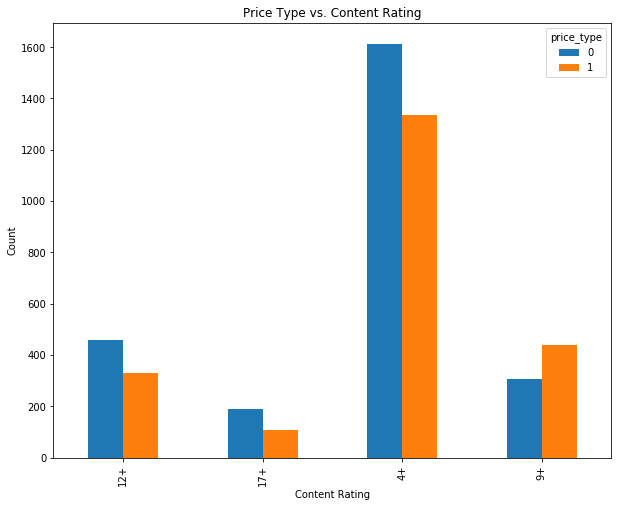

In [66]:
pd.crosstab(top_rating.cont_rating,top_rating.price_type).plot(kind='bar', figsize = (10,8))
plt.title('Price Type vs. Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.show()

### Sort By Rating Count



In [68]:
# Sort by rating count

Rating_count = app_info.sort_values('rating_count_tot',ascending = False).head(100)
Rating_count['price_type'] = app_info_re['price_type']
Rating_count

,track_name,size_bytes,currency,price,rating_count_tot,rating_count_cur,user_rating,user_rating_cur,version,cont_rating,prime_genre,sup_devices_num,screenshot_num,lang_num,vpp_lic,price_type
16,Facebook,389879808,USD,0.00,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1,0
519,Instagram,113954816,USD,0.00,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1,0
1346,Clash of Clans,116476928,USD,0.00,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1,0
707,Temple Run,65921024,USD,0.00,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1,0
7,Pandora - Music & Radio,130242560,USD,0.00,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1,0
755,Pinterest,74778624,USD,0.00,1061624,1814,4.5,4.0,6.26,12+,Social Networking,37,5,27,1,0
4,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,0
1493,Candy Crush Saga,222846976,USD,0.00,961794,2453,4.5,4.5,1.101.0,4+,Games,43,5,24,1,0
178,Spotify Music,132510720,USD,0.00,878563,8253,4.5,4.5,8.4.3,12+,Music,37,5,18,1,0
275,Angry Birds,175966208,USD,0.00,824451,107,4.5,3.0,7.4.0,4+,Games,38,0,10,1,0


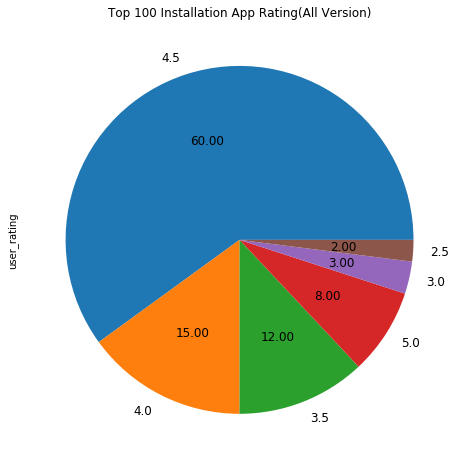

In [69]:
plt.figure(figsize=(8,8))
Rating_count.user_rating.value_counts().plot(kind = 'pie', autopct='%.2f', fontsize=12)
plt.title('Top 100 Installation App Rating(All Version)')
plt.show()

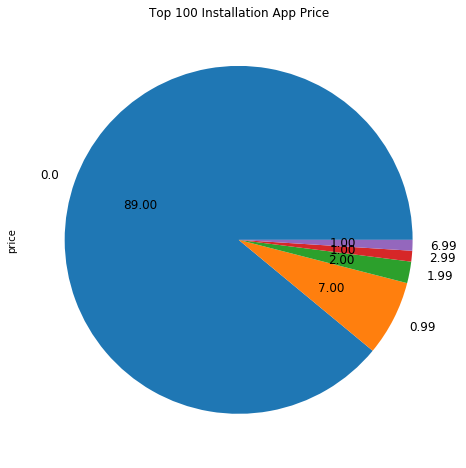

In [70]:
plt.figure(figsize=(8,8))
Rating_count.price.value_counts().plot(kind = 'pie', autopct='%.2f', fontsize=12)
plt.title('Top 100 Installation App Price')
plt.show()

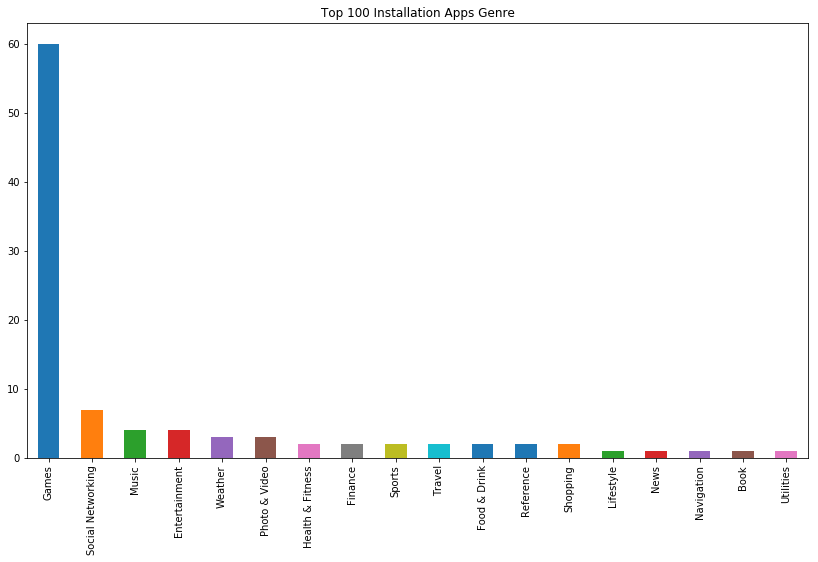

In [71]:
plt.figure(figsize=(14,8))
Rating_count.prime_genre.value_counts().plot(kind = 'bar')
plt.title('Top 100 Installation Apps Genre')
plt.show()

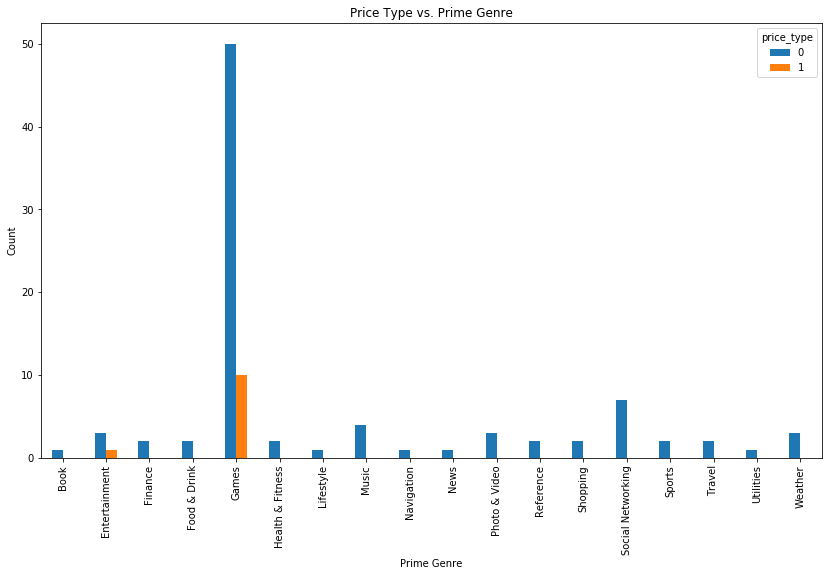

In [72]:
pd.crosstab(Rating_count.prime_genre,Rating_count.price_type).plot(kind='bar', figsize = (14,8))
plt.title('Price Type vs. Prime Genre')
plt.xlabel('Prime Genre')
plt.ylabel('Count')
plt.show()

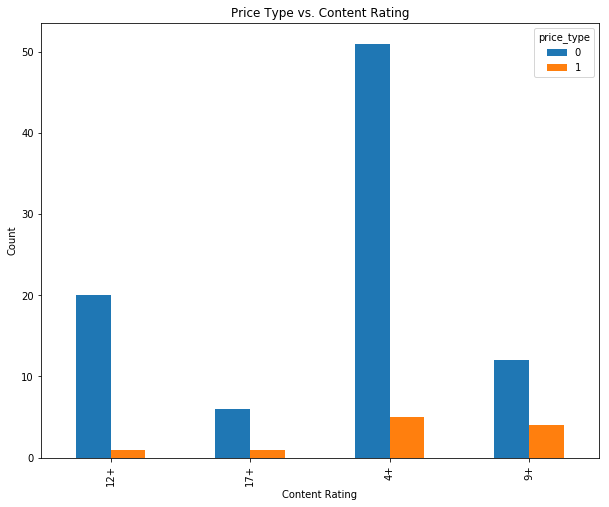

In [73]:
pd.crosstab(Rating_count.cont_rating,Rating_count.price_type).plot(kind='bar', figsize = (10,8))
plt.title('Price Type vs. Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.show()